# Exercise 2 - Answers

## Task 1
* max 2 points, 1 point for correct obj function, 1 point for correct constraint


The profit that you make **for each kwH** is $2-0.01x^2-(1-0.01x)$. Thus, the amount of profit that you make is
$$
(1+0.01x-0.01x^2)x=x+0.01x^2-0.01x^3.
$$
Thus, the optimization problem is
$$
\begin{align}
\max \qquad & x+0.01x^2-0.01x^3\\
\text{s.t.} \qquad & 0\leq x \leq 50.
\end{align}
$$

## Task 2
* max 2 points, 2 points if one gets correct solution, points are reduced if the implementation has any flaws 

In [1]:
def bisection_line_search(a,b,f,L,epsilon):
    x = a
    y = b
    iters = 0
    while y-x>2*L:
        if f((x+y)/2+epsilon)>f((x+y)/2-epsilon):
            y=(x+y)/2+epsilon
        else:
            x = (x+y)/2-epsilon
        iters = iters + 1
    return (x+y)/2, iters

In [2]:
# the problem to be solved
def f_ex2(x):
    return (1-x)**2+x

In [12]:
(x_opt,iters) = bisection_line_search(0,2,f_ex2,0.0001,1e-6)
print("Local optimum approximation:", x_opt)
print("Number of iterations:", iters)

Local optimum approximation: 0.49993946490478514
Number of iterations: 14


In [4]:
# check the objective function value at the solutions found
print(f_ex2(x_opt))

# check the objective function values at the end points of the interval
print(f_ex2(0), f_ex2(2))

0.7500000036644978
1 3


## Task 3
* max 2 points, 2 points if one gets correct solution, points are reduced if the implementation has any flaws 

In [5]:
import math
def golden_section_line_search(a,b,f,L):
    x = a
    y = b
    iters = 0
    golden_ratio = (math.sqrt(5.0)-1)/2.0
    f_left = f(y-golden_ratio*(y-x)) #funtion eval 
    f_right = f(x+golden_ratio*(y-x)) #function eval
    while y-x>2*L:
        if f_left > f_right:
            x = y-golden_ratio*(y-x)
            f_left = f_right #no function eval
            f_right = f(x+golden_ratio*(y-x)) #function eval
        else:
            y = x+golden_ratio*(y-x)
            f_right = f_left #no function eval
            f_left = f(y-golden_ratio*(y-x)) #function eval
        iters = iters + 1
    return (x+y)/2, iters

In [6]:
(x_opt2,iters) = golden_section_line_search(0,2,f_ex2,0.0001)
print(x_opt2)
print(iters)

0.4999795718254958
20


## Task 4
* 1 point for each problem

**Problem 1**: $f(x)=x+0.01x^2-0.01x^3$. Thus,
$$
f'(x) = 1 + 2*0.01x - 3*0.01x^2 = 1 + 0.02x - 0.03x^2
$$
and
$$
f''(x) = 0.02-0.06x.
$$

If $f'(x) = 0$, then 
$$
x = \frac{-0.002\pm\sqrt{0.02^2-4*(-0.03)*1}}{2*(-0.03)}=\frac{0.02\pm\sqrt{0.1204}}{0.06}
$$

In [7]:
def f1(x):
    return x+0.01*x**2-0.01*x**3

In [8]:
import math
x1 = (0.02+math.sqrt(0.1204))/0.06
x2 = (0.02-math.sqrt(0.1204))/0.06
x3 = 0.0 # lower bound
x4 = 50.0 # upper bound
print(x1, x2, x3, x4)
print(f1(x1),f1(x2),f1(x3),f1(x4))

6.116450524299158 -5.449783857632491 0.0 50.0
4.202336906253436 -3.534188758105288 0.0 -1175.0


$f''(x)<0$ when $0.02-0.06x<0$ that is $x>1/3$. So $x=\frac{0.02+\sqrt{0.1204}}{0.06}\approx 6.116$ is a local maximum.

In [9]:
def hf(x):
    return 0.02-0.06*x

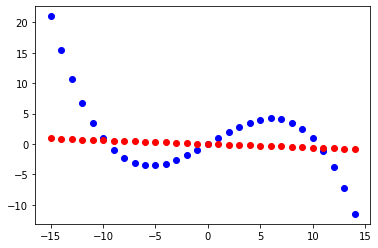

0.0


In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-15.0, 15.0, 1.0)
#plt.plot(x, f1(x), 'bo')
plt.plot(x, f1(x), 'bo', x, hf(x),'ro') # objective function blue, second derivative red
plt.show()
print(f1(0.0))

**Problem 2**: Now, $f(x) = (1-x)^2+x$. Thus, 
$$
f'(x)=2(1-x)(-1)+1= -1 +2x.
$$


If $f'(x) = 0$, then $2x=1$ and $x=\frac 12$.
This is a local minimum since,
$$
f''(x) = 2,
$$
which is greater than $0$.

This means that the algorithms work!